# Algorytm wyczerpującego przeszukiwania

Inna nazwa to brute force. Tutaj użyjemy potężniejszych wersji tego algorytmu. Ogólna ide jest 


## Implementacja naiwna

W naiwnej implementacji wyczerpującego przeszukiwania


In [2]:
# Implementacja naiwnej pętli
import numpy as np

from math import inf
from tqdm import tqdm
from itertools import product
from funkcje_pomocnicze import calculate_energy

def brute_force_naive(J, h):
    best_energy = inf
    best_state = None
    n = len(h)

    for state in tqdm(product([-1, 1], repeat=n), desc="Wyczerpujące przeszukiwanie", total=2**n):
        state = np.array(state)
        energy = calculate_energy(J, h, state, convention="dwave")
        if energy < best_energy:
            best_energy = energy
            best_state = state

    return best_state, best_energy

Wyczerpujące przeszukiwanie dla różnych n:   0%|          | 0/23 [00:00<?, ?it/s]

Wyczerpujące przeszukiwanie dla różnych n: 100%|██████████| 23/23 [04:42<00:00, 12.27s/it]


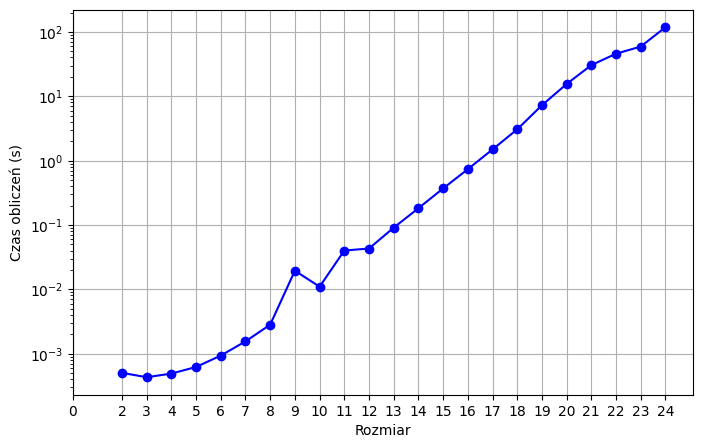

In [4]:
# Polecam zobaczyć jak rozmiar n wpływa na czas obliczeń, dla n>20 czas obliczeń zaczyna rosnąć bardzo szybko
import time
import matplotlib.pyplot as plt
from IPython.utils.io import capture_output

times = []
n_range = list(range(2, 25))
for n in tqdm(n_range, desc="Wyczerpujące przeszukiwanie dla różnych n"):

    J = np.triu(np.random.uniform(-1, 1, size=(n, n)), k=1)  # losowa gęsta macierz górnotrójkątna
    h = np.random.uniform(-1, 1, size=n)  # losowy wektor
    start = time.time()
    with capture_output() as captured:
        state, energy = brute_force_naive(J, h)
    end = time.time()
    elapsed = end - start
    times.append(elapsed)

plt.figure(figsize=(8, 5))
plt.plot(n_range, times, marker='o', linestyle='-', color='blue', label='Execution Time')
plt.xlabel('Rozmiar')
plt.xticks([0] + n_range)
plt.yscale('log', base=10)
plt.ylabel('Czas obliczeń (s)')
plt.grid(True)
plt.show()


# sol_energy, sol_state = brute_force_naive(J, h)
# print(sol_energy, sol_state)


Jak widzać ta implementacja nie jest zbyt efektywna

In [4]:
# Instancja testowa 24 spiny

import time
from funkcje_pomocnicze import read_instance, K8
J, h = read_instance(K8.path)  # używamy konwencji dwave ponieważ macierz jest górnotrójkątna.

start = time.time()
state, energy = brute_force_naive(J, h)
end = time.time()

print(f"Otrzymana energia: {energy}")
print(f"Stan podstawowy: {K8.best_energy}")
print(f"czas: {end - start}")


Wyczerpujące przeszukiwanie: 100%|██████████| 256/256 [00:00<00:00, 64107.82it/s]

Otrzymana energia: -16.0
Stan podstawowy: 0
czas: 0.007290363311767578
